n_sample =  32


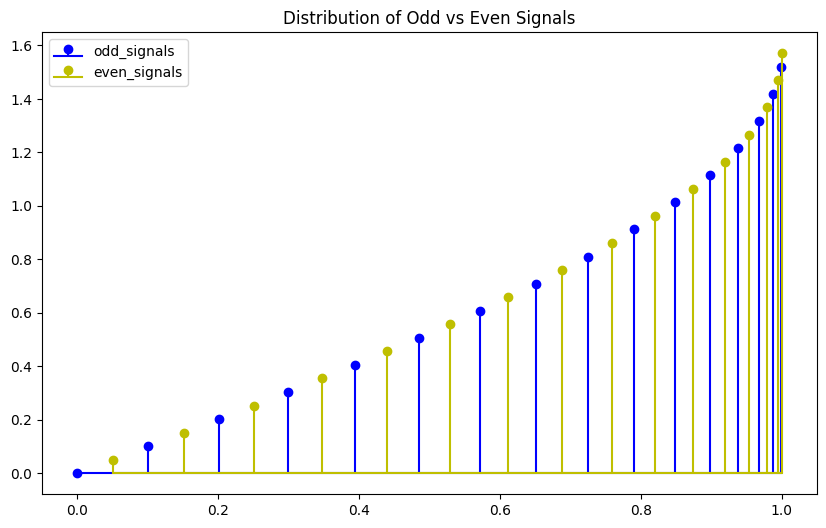

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt_figsize = (10,6)
n_sample = 2**5
print('n_sample = ', n_sample)
theta = np.linspace(0, np.pi / 2, num=n_sample)
sine_data = np.sin(theta)

theta_odd = theta[0::2]
sine_odd = sine_data[0::2]

theta_even = theta[1::2]
sine_even = sine_data[1::2]

plt.figure(figsize=plt_figsize)
plt.stem(sine_odd, theta_odd, linefmt='b-', basefmt='b-', label='odd_signals')
plt.stem(sine_even, theta_even, linefmt='y-', basefmt='y-', label='even_signals')
plt.legend()

plt.title('Distribution of Odd vs Even Signals')
plt.show()

In [50]:
- np.finfo(np.float32).max

-3.4028235e+38

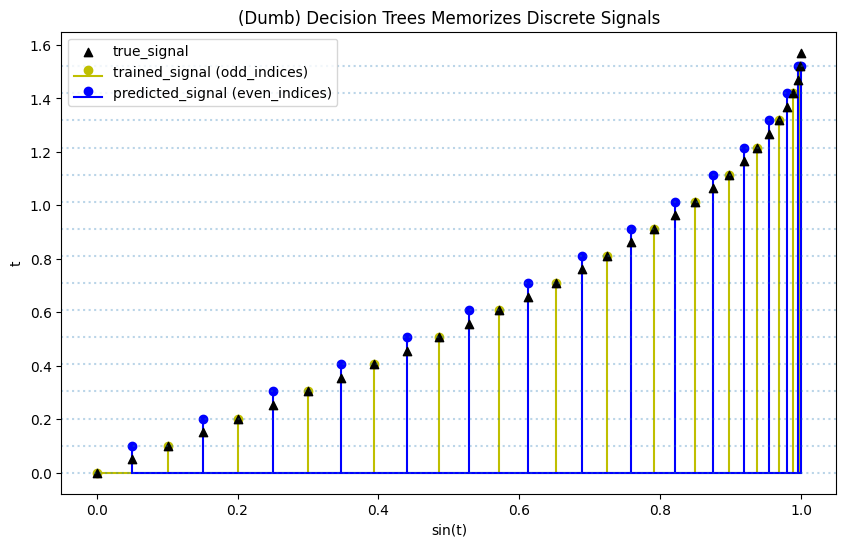

In [66]:
class Naive1DDecisionTreeRegressor:
    def __init__(self):
        self.min_thresh = -np.finfo(np.float32).max
        self.max_tresh = np.finfo(np.float32).max

    def fit(self, X, y):
        self.thresholds = np.unique(X.reshape(-1))
        self.thresholds = np.concatenate(([ self.min_thresh ], self.thresholds, [ self.max_tresh ]))

        self.leaves_preds = np.unique(y.reshape(-1))
        self.leaves_preds = np.concatenate(([ self.leaves_preds[0] ], self.leaves_preds, [ self.leaves_preds[-1] ]))

    def predict(self, X):
        region_per_sample = X <= self.thresholds
        regions_indices = np.argmax(region_per_sample, axis=1)
        preds = self.leaves_preds[regions_indices]
        return preds
    
def train_plot_decision_tree(x, x_train, x_test, y, y_train, train_label, test_label):
    dumb_tree_model = Naive1DDecisionTreeRegressor()
    dumb_tree_model.fit(x_train.reshape(-1,1), y_train)
    y_pred = dumb_tree_model.predict(x_test.reshape(-1,1))

    plt.figure(figsize=plt_figsize)
    plt.stem(x_train, y_train, linefmt='y-', basefmt='y-', label=f'trained_signal ({train_label})')
    plt.stem(x_test, y_pred, linefmt='b-', basefmt='b-', label=f'predicted_signal ({test_label})')
    plt.scatter(x, y, color='black', label='true_signal', marker='^', zorder=2)
    plt.legend()

    for i in range(0, y_pred.shape[0]):
        plt.axhline(y_train[i], linestyle='dotted', alpha=0.3)

    plt.title('(Dumb) Decision Trees Memorizes Discrete Signals')
    plt.xlabel('sin(t)')
    plt.ylabel('t')
    plt.show()


train_plot_decision_tree(sine_data, sine_odd, sine_even, theta, theta_odd, 'odd_indices', 'even_indices')

        
         

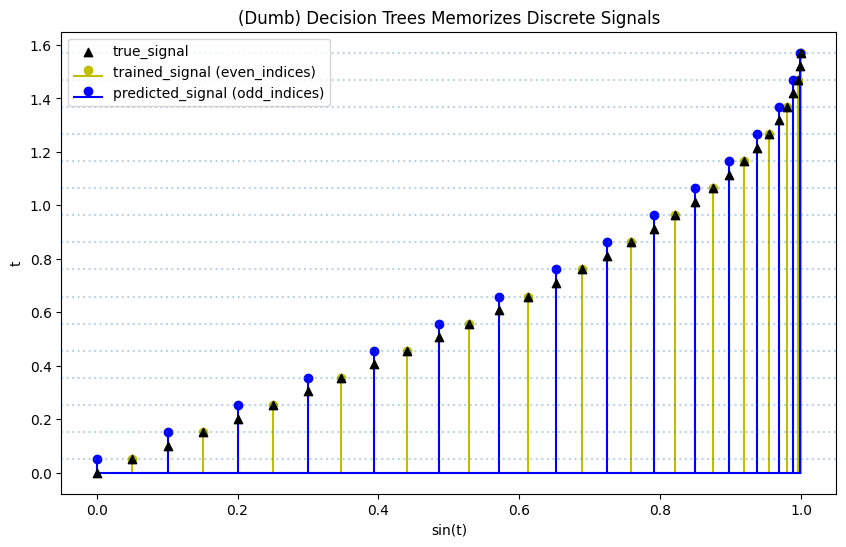

In [67]:
train_plot_decision_tree(sine_data, sine_even, sine_odd, theta, theta_even, 'even_indices', 'odd_indices')

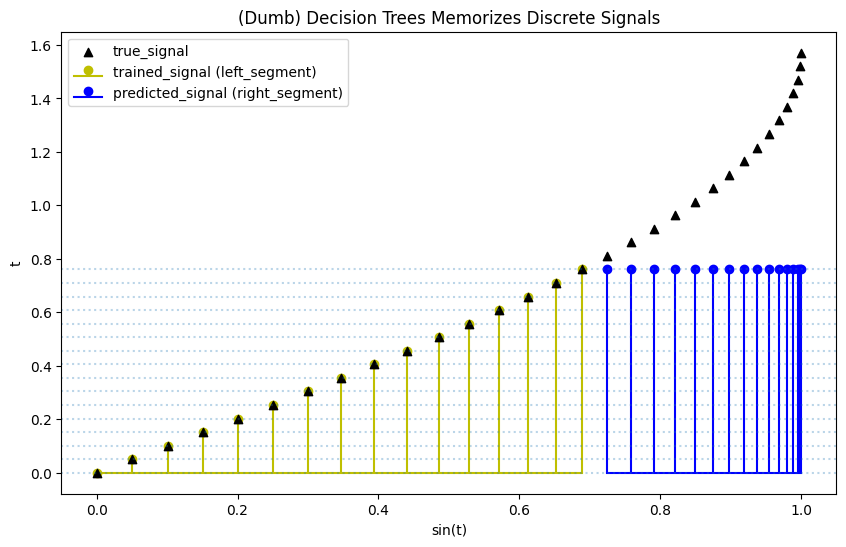

In [68]:
sine_left = sine_data[0:sine_data.shape[0] // 2]
theta_left = theta[0:theta.shape[0] // 2]

sine_right = sine_data[sine_data.shape[0] // 2 : ]
theta_right = theta[theta.shape[0] // 2: ]

# Let's just train our data on the left segment of the dataset
train_plot_decision_tree(sine_data, sine_left, sine_right, theta, theta_left, 'left_segment', 'right_segment')

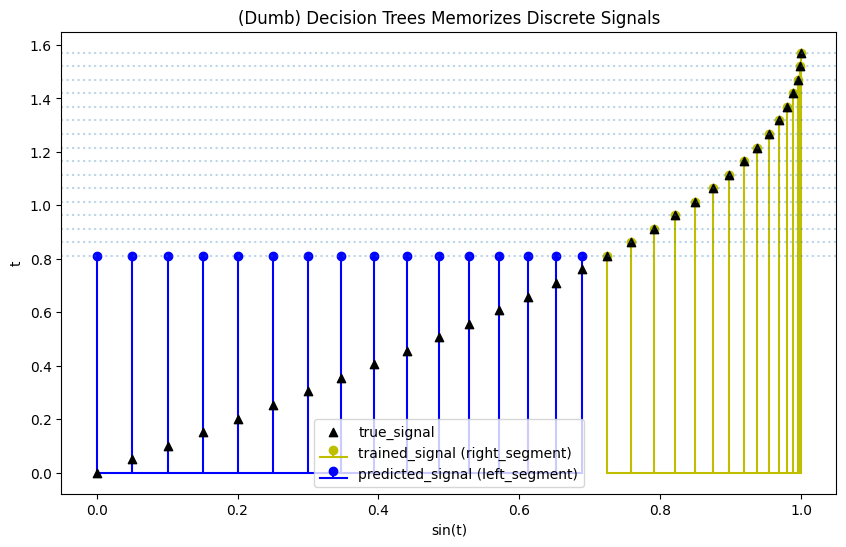

In [65]:
train_plot_decision_tree(sine_data, sine_right, sine_left, theta, theta_right, 'right_segment', 'left_segment')